## Introduction

For the past few days I was learning Python for Data Analysis and I think it's about time to put into a test my new gained knowledge by making a data analysis project. As a beginner data analyst/scientist, my codes may not be efficient or good so please bear with me haha. Anyway, any comments and suggestions will be greatly appreciated!

## About the Dataset

I found this dataset that caught my attention and interest from [Kaggle](https://www.kaggle.com/sidtwr/videogames-sales-dataset). This is a video games sales dataset that is scraped (on Dec., 2016) from [vgchartz](https://www.vgchartz.com/), a website that tracks the sales of physical copies of games for different console/platforms. I found this dataset to be interesting and great to start my first project on.

## About data cleaning and transformation procedures
The data cleaning and transformation procedures is not included in this notebook and I instead placed it in another notebook file which is located in this directory: ./data_cleaning_script.ipynb/ . If you have concerns about the data cleaning and transformation procedures, please refer to this notebook file.

## Importing Libraries

For this project, I used [Pandas](https://pandas.pydata.org/pandas-docs/stable/) mainly for data cleaning, manipulation, and analysis and [Matplotlib](https://matplotlib.org/) for data visualizations:

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Loading and Checking

In [2]:
# Load cleaned dataset:
vg_sales = pd.read_csv('./dataset/vg_sales_cleaned.csv', index_col=0)

In [3]:
# Check first few records:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,North America Sales,Europe Sales,Japan Sales,Others Sales,Global Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check DataFrame info:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16717 non-null  object 
 1   Platform             16719 non-null  object 
 2   Year_of_Release      16719 non-null  int64  
 3   Genre                16717 non-null  object 
 4   Publisher            16473 non-null  object 
 5   North America Sales  16719 non-null  float64
 6   Europe Sales         16719 non-null  float64
 7   Japan Sales          16719 non-null  float64
 8   Others Sales         16719 non-null  float64
 9   Global Sales         16719 non-null  float64
 10  Critic_Score         8137 non-null   float64
 11  Critic_Count         8137 non-null   float64
 12  User_Score           7590 non-null   float64
 13  User_Count           7590 non-null   float64
 14  Rating               9950 non-null   object 
dtypes: float64(9), int64(1), object(5)
m

To know more about the context of each columns refer to this link: https://www.kaggle.com/sidtwr/videogames-sales-dataset

## Exploratory Data Analysis on Video Games Sales (1980-2016)

These are the questions that I have asked about the data:

* [How the trend for physical video games incline/decline for the past years?](#vg_trend)
* [What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?](#platform_trend)

In [5]:
def add_bar_label(ax, s, yincr=0, xincr=0, isbarh=False, **kwargs):
    if isbarh:
        for i in s.index:
             ax.text(s.loc[i]+xincr, i, round(s.loc[i], 2), 
                     ha='center', **kwargs)
    else:
        for i in s.index:
            ax.text(i, s.loc[i]+yincr, round(s.loc[i], 2), 
                    ha='center', **kwargs)

### <a id='vg_trend'>Total Number of Published Video Games per Year (1980-2016)</a>

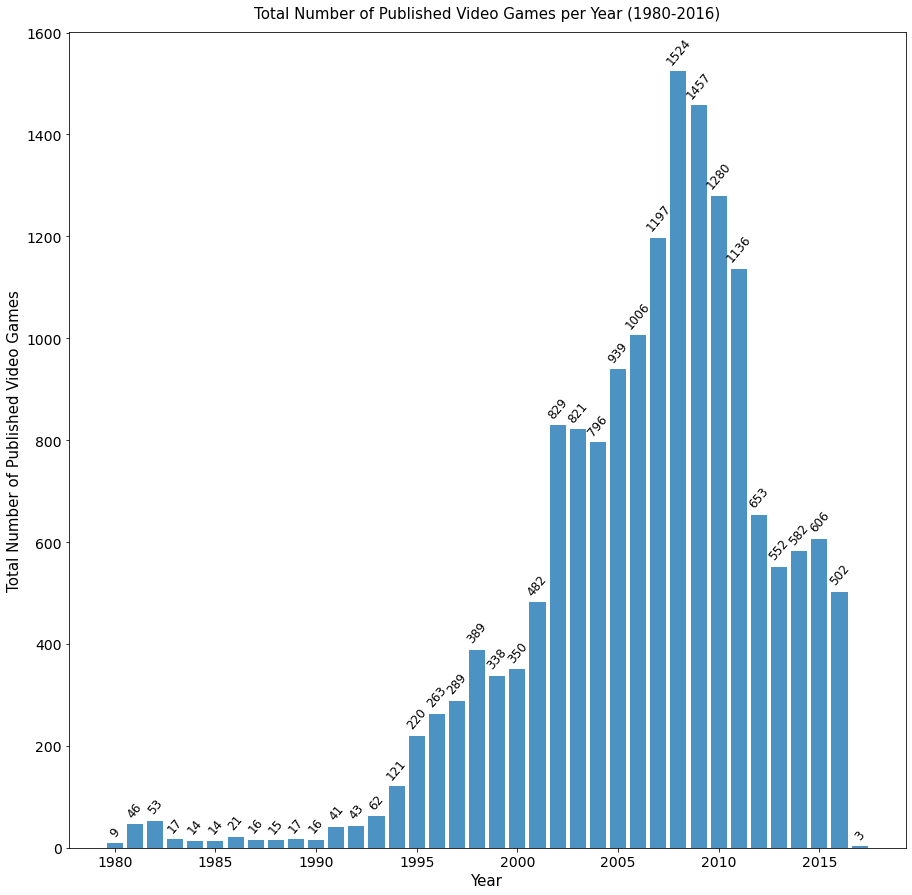

In [6]:
# How the trend for video games grow for the past years?
year_sales = vg_sales['Year_of_Release'].value_counts()
year_sales = year_sales.sort_index()
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(year_sales.index, year_sales.values, alpha=0.8)
ax.set_title('Total Number of Published Video Games per Year (1980-2016)', 
             fontsize=15, y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Number of Published Video Games', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, year_sales, 15, 
              fontsize='large', rotation=50)

In [7]:
# function to compute for percent change
def get_pct_change(prev, new, s):
    pct_change = (s.loc[new] - s.loc[prev]) / s.loc[prev]
    return pct_change * 100

print(f'Percent change from 1980 to 2008: {get_pct_change(1980, 2008, year_sales)}')
print(f'Percent change from 2008 to 2016: {get_pct_change(2008, 2016, year_sales)}')

Percent change from 1980 to 2008: 16833.333333333336
Percent change from 2008 to 2016: -67.06036745406824


**Interpretation:**

From the graph, we can see that the trend for unique physical copies of video games for different gaming platforms started to increase from 1980 to its highest peak on 2008 with percent change of **16,833.33%**.

Also, just after the highest trend peak on 2008 the trend decreased from 1524 physical copies sold to 502 physical copies in 2016 with percent change of **-67.06%**. This decline on trend of physical copies of video games is I believe because of the take over of downloads and that gamers begun to transition away from purchasing physical copies of games towards the digital distributions.

## <a id='five_year'>Top 5 platforms for each 5 year time period since 1980</a>

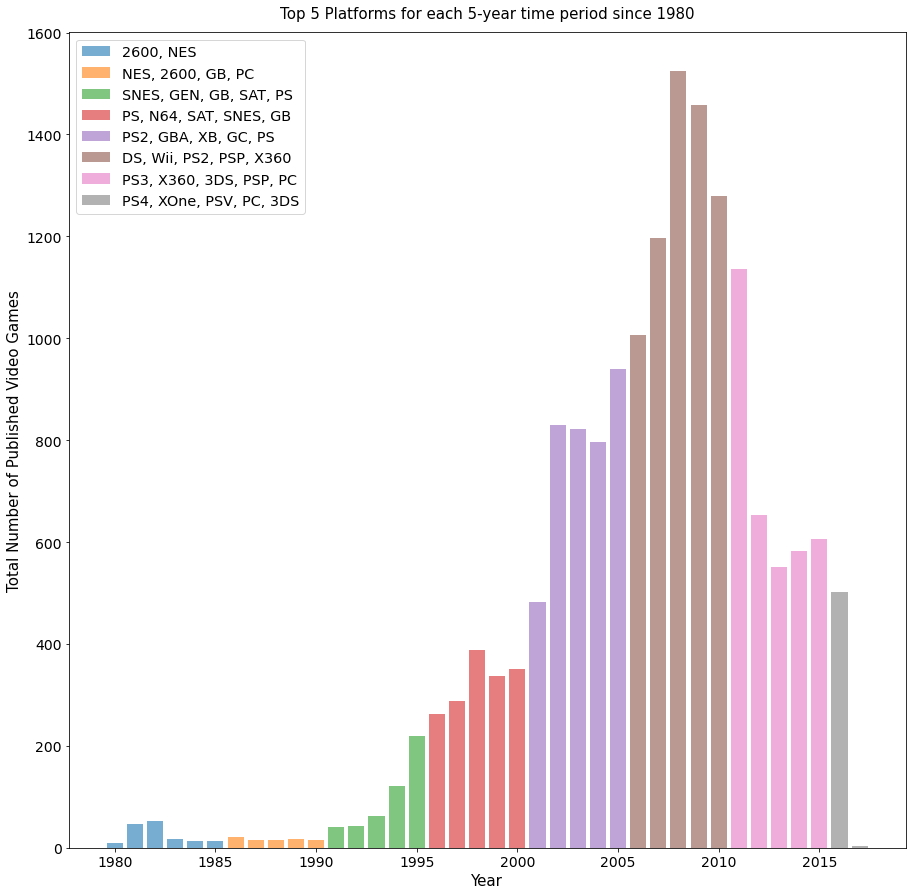

In [8]:
# What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?

# function to get the modal platforms in a given year range
def get_modal_platform(year_range):
    year_range_record = vg_sales[vg_sales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(15, 15))
start, end = 1980, 1985
for i in range(10):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    ax.bar(year_sales.loc[start:end].index,
           year_sales.loc[start:end].values, 
           label=modal_platform, alpha=0.6)
    start = end + 1
    end = end + 5

ax.set_title('Top 5 Platforms for each 5-year time period since 1980', fontsize=15, y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Number of Published Video Games', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
_ = ax.legend(fontsize='x-large')

**Interpretation:**

This graph shows which video game platforms dominated the market for each 5-year time period since 1980 based on what platform a video game is designed to.

Here we can see that during the highest trend peak on 2005 to 2010 the top 5 modal platforms are: **Nintendo DS, Wii, PS2, PSP, and X360.**

### Total Global Sales per Platform

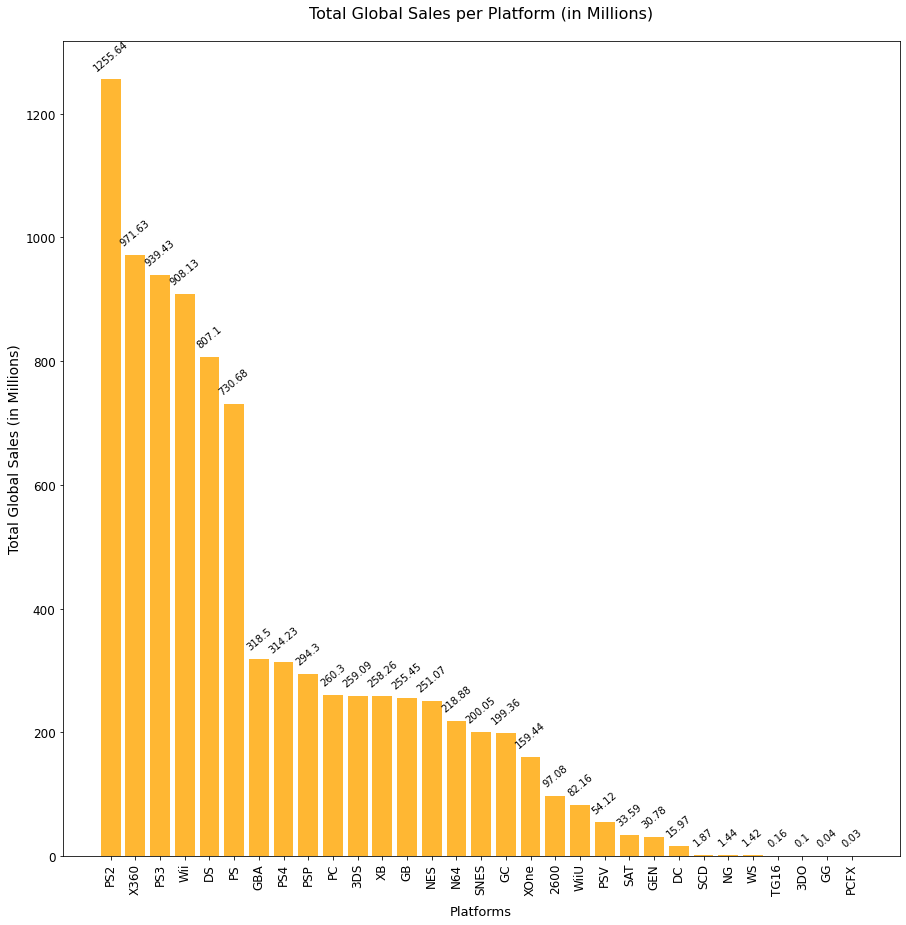

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))

# Compute for total vg global sales for each platform
platform_global_sales = vg_sales.groupby('Platform')['Global Sales']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
ax.bar(platform_global_sales.index, platform_global_sales.values, color='orange', alpha=0.8)
ax.set_title('Total Global Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
add_bar_label(ax, platform_global_sales, 15, fontsize='medium', rotation=40)
fig.subplots_adjust(hspace=0.30)

**Interpretation:**

We can see from this chart that **PS2** have the highest total global sales of **1.256 billion** unit of games. This is followed by **X360** and **PS3** with **972 and 939 million** of global sales respectively.

### Total Number of Published Video Games by Genre (1980-2016) 

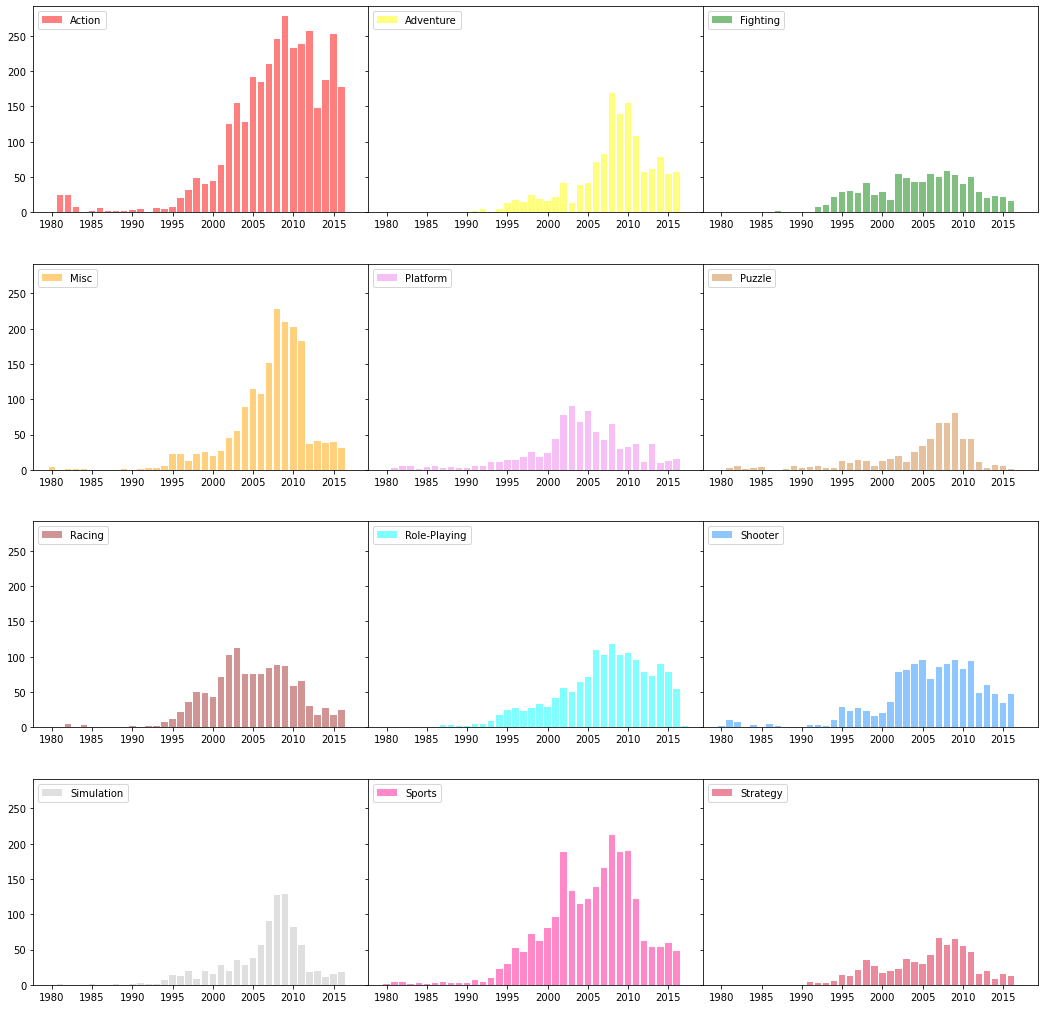

In [10]:
# How is the trend for each Genre grow for the past years?
res = pd.crosstab(vg_sales['Year_of_Release'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=True)
colors_genre = ['red','yellow', 'green', 'orange','violet', 'peru', 
          'brown', 'cyan','dodgerblue','silver','deeppink','crimson']
for i in range(4):
    for j in range(3):
        genre_rec = res.iloc[:, i*3+j]
        axes[i, j].bar(genre_rec.index, genre_rec.values, label=genre_rec.name, 
                       color=colors_genre[i*3+j], alpha=0.5)
        axes[i, j].legend(loc='upper left')
fig.subplots_adjust(hspace=0.25, wspace=0)

**Interpretation:**

This graph show us how the total number of published games per genre changed since 1980 to 2016.

We can see that **Action, Misc, Platform, Puzzle, Shooter, and Sports** game genres are already being published since 1980s.

And that the number of games for genres such as **Adventure, Fighting, Racing, Role-Playing, Simulation, and Strategy** games begun to increase in 1990s.

The number of published **Platform** games reached its peak in 2003 and begun to drop just after that. This is different with other genres that are still increasing in numbers after 2003.

Also, we can still see an increase in number of published physical **Action** games after 2010 in which all game genres begun to drop in publication numbers.

## <a id='global_sales_genre'>Total Global Sales by Genre (1980-2016)</a>

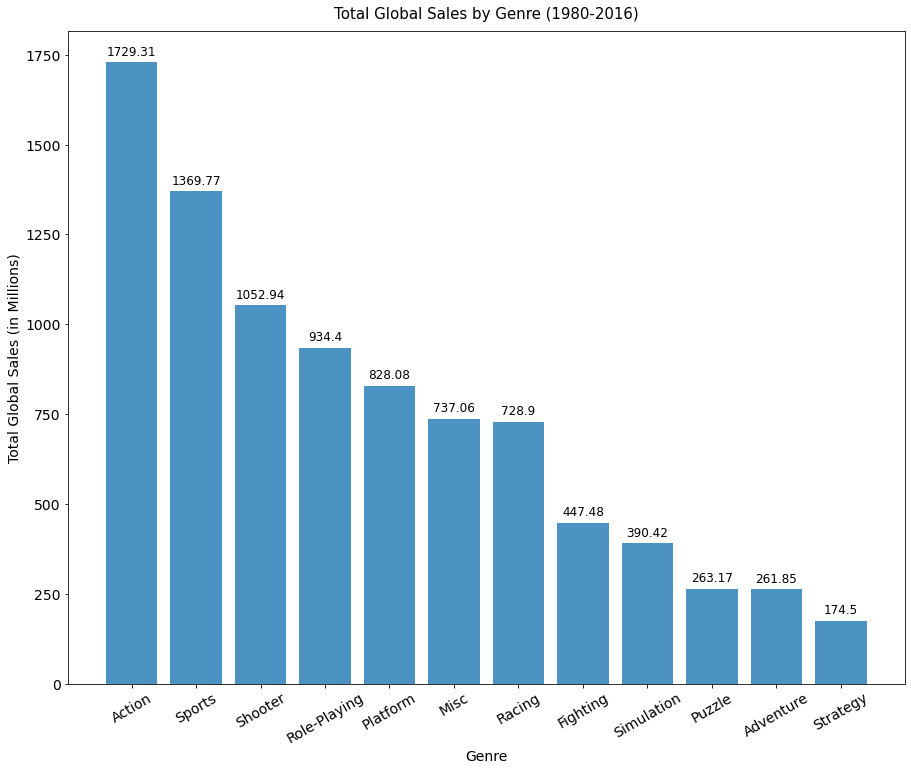

In [11]:
# What is the highest selling genre?
fig, ax = plt.subplots(figsize=(15, 12))
grouped = vg_sales.groupby('Genre')['Global Sales']
res = grouped.agg('sum').sort_values(ascending=False)
ax.bar(res.index, res.values, alpha=0.8)
ax.set_title('Total Global Sales by Genre (1980-2016)', fontsize=15, y=1.01)
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.tick_params(axis='x', labelsize=14, rotation=30)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, res, yincr=20, fontsize='large')

**Interpretation:**

The graph above shows the total global sales of physical video games by genre since 1980.

From the graph, we can see that **Action** genre have the highest sale of **1.729 billion** units of physical games sold from 1980 to 2016. This is followed by **Sports** and **Shooter** with **1.370 billion** and **1.053 billion** of units sold respectively. 

## Top 10 Platforms with most published physical games for each Genre

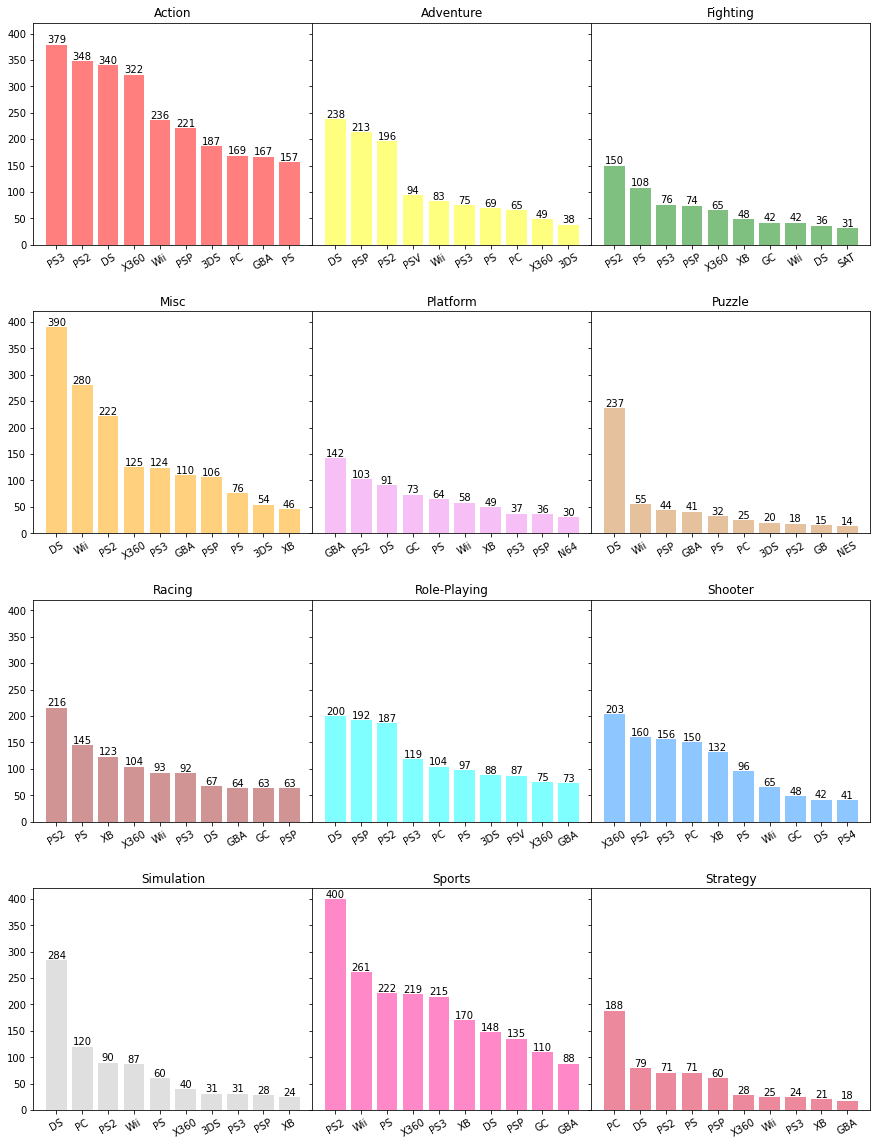

In [12]:
# What are the top 10 modal platforms for each Genre?
res = pd.crosstab(vg_sales['Platform'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 20), sharey=True)
for i in range(4):
    for j in range(3):
        rec = res.iloc[:, i*3+j].sort_values(ascending=False)[:10]
        axes[i, j].bar(rec.index, rec.values, color=colors_genre[i*3+j], alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=12)
        axes[i, j].tick_params(axis='x', rotation=30)
        add_bar_label(axes[i, j], rec, yincr=3, fontsize='medium')
fig.subplots_adjust(hspace=0.3, wspace=0)

**Interpretation:**

The graph above shows the top 10 Platforms with most published physical games for each Genre.

For example, we can see that **PS3** is the top most platform for **Action** with **380** action game titles designed for PS3.

### Total Physical Video Game Sales per Country

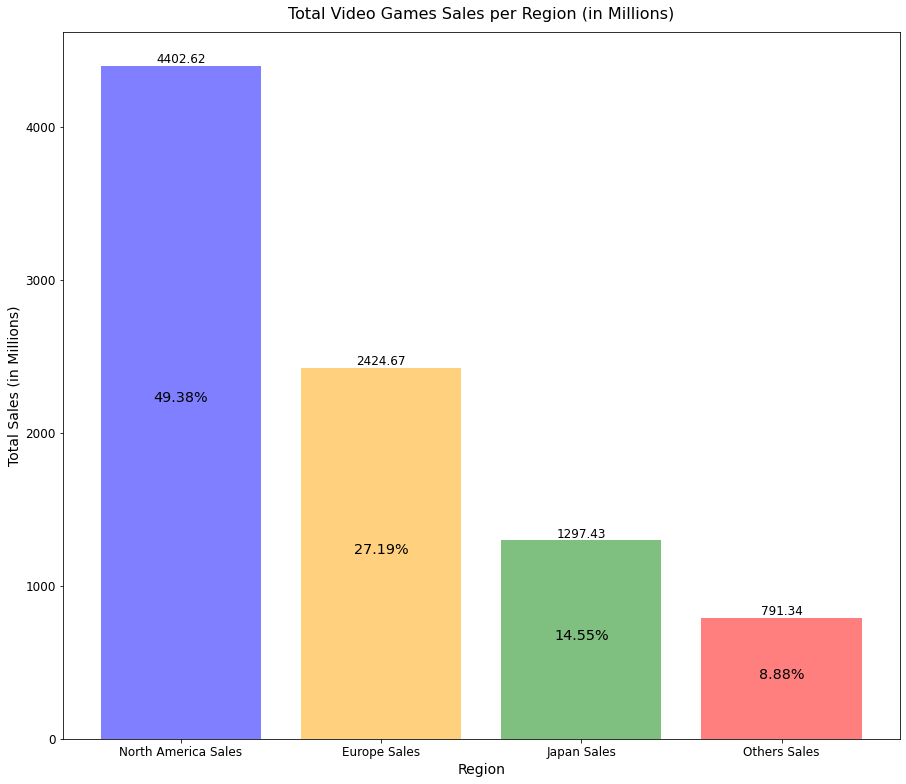

In [13]:
region_sales_total = vg_sales.iloc[:, 5:9].sum(axis=0)
fig, ax= plt.subplots(figsize=(15, 13))
ax.bar(region_sales_total.index, region_sales_total.values, 
           color=['blue', 'orange', 'green', 'red'], alpha=0.5)
ax.set_title('Total Video Games Sales per Region (in Millions)', fontsize=16, y=1.01)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Total Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
add_bar_label(ax, region_sales_total, yincr=20, fontsize='large')
# Add percentages
region_sales_pct = region_sales_total.div(region_sales_total.sum()) * 100
for i in region_sales_pct.index:
    i_pct = f'{round(region_sales_pct.loc[i], 2)}%'
    ax.text(i, region_sales_total.loc[i] // 2, i_pct, ha='center',
           fontsize='x-large')

**Interpretation:**

The graph above shows the total sales (in millions) of video games by country since 1980.

As we can see here, **49.38%** of the sales are coming from North America with **4.403 billion** units of physical video games sold since 1980.
This is followed by Europe and Japan with **27.19%** and **14.55%** of total global sales of physical video games respectively while **8.88%** of the total global sales are coming from the other parts of the world. 

## Top 10 high selling platforms per Country

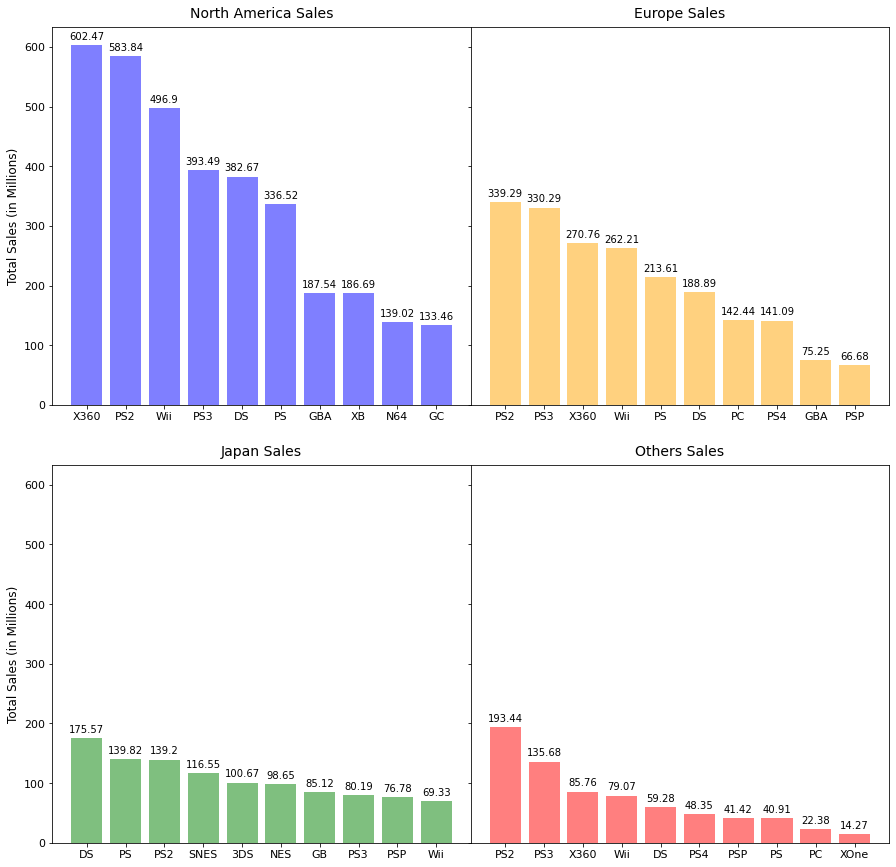

In [14]:
grouped = vg_sales.groupby('Platform')[['North America Sales', 'Europe Sales', 
                                        'Japan Sales', 'Others Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
colors_region = ['blue', 'orange', 'green', 'red']
for i in range(2):
    for j in range(2):
        idx = i*2+j
        rec = res.iloc[idx, :].sort_values(ascending=False)[:10]
        axes[i, j].bar(rec.index, rec.values, color=colors_region[idx], alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=14, y=1.01)
        if idx % 2 == 0:
            axes[i, j].set_ylabel('Total Sales (in Millions)', fontsize=12)
        axes[i, j].tick_params(axis='x', labelsize=11)
        axes[i, j].tick_params(axis='y', labelsize=11)
        add_bar_label(axes[i, j], rec, yincr=10)
fig.subplots_adjust(hspace=0.16, wspace=0)

**Interpretation:**

The graphs above shows the top 10 high selling platforms per country (or the platforms that most sold physical games  in each country are designed to).

For example, **X360** is the top 1 platform with highest sales of **602.47 million** in North America.

Also, in Japan, the top 1 platform with highest sales is **Nintendo DS** (which is a handheld console) with **175.57 million** physical games sold for it. 

## Ranking of Video Game Genres per Country

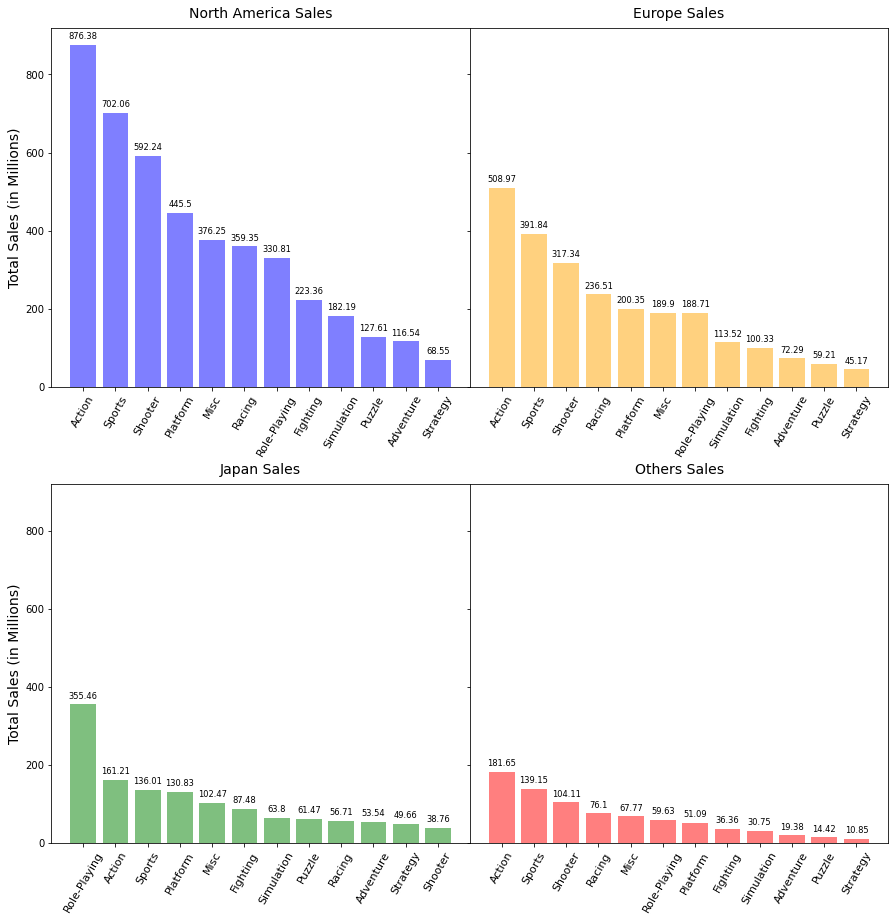

In [15]:
grouped = vg_sales.groupby('Genre')[['North America Sales', 'Europe Sales', 
                                     'Japan Sales', 'Others Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i in range(2):
    for j in range(2):
        idx = i*2+j
        rec = res.iloc[idx, :].sort_values(ascending=False)
        axes[i, j].bar(rec.index, rec.values, color=colors_region[idx], alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=14, y=1.01)
        if idx % 2 == 0: 
            axes[i, j].set_ylabel('Total Sales (in Millions)', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=11, rotation=60)
        add_bar_label(axes[i, j], rec, yincr=15, fontsize='small')
fig.subplots_adjust(wspace=0, hspace=0.27)

**Interpretation:**

The graph above shows the ranking of physical video game genres based on sales per country.  

We can see here that **Action, Sports, and Shooter** are the top 3 most published game genre for North America, Europe, and for other countries except for Japan with **Role-Playing** genre as the its top 1 most popular.

**Action, Sports, and Shooter** being the top most published games globally (except Japan) is not surprising as the graph [Total Global Sales by Genre (1980-2016)](#global_sales_genre) already confirmed this fact.

Also, it's not surprising how **Role-Playing** genre is top by Japan as most eastern RPGs are Japanese role-playing video games (JRPGs), developed in Japan.

## <a id='global_sales_title'>Top 20 High Selling Video Game Titles (1980-2016)</a>

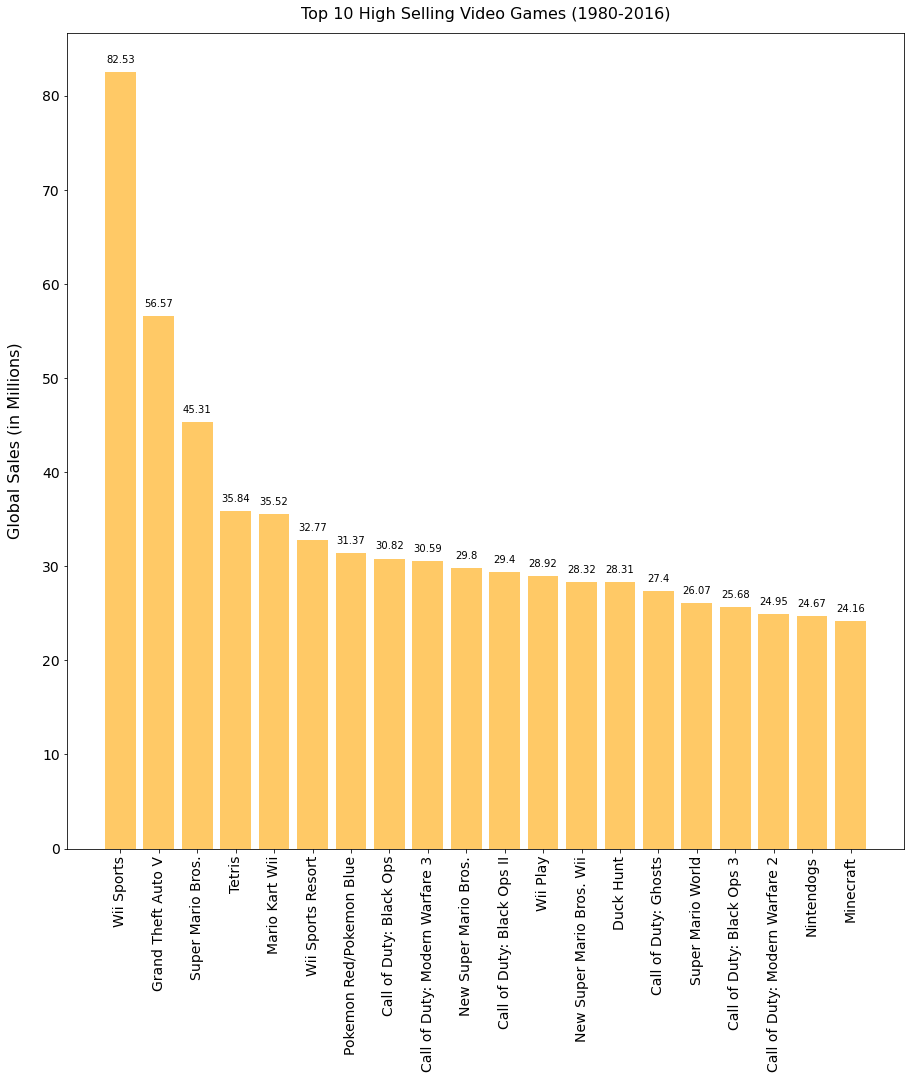

In [16]:
# Top 10 games with highest global sales:
res = vg_sales.groupby('Name')['Global Sales']
res = res.sum().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(res.index, res.values, color='orange', alpha=0.6)
ax.set_title('Top 10 High Selling Video Games (1980-2016)', fontsize=16, y=1.01)
ax.set_ylabel('Global Sales (in Millions)', fontsize=16, labelpad=20)
ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, res, yincr=1, fontsize='medium')

**Interpretation:**

The graph above shows the top 20 games with highest global sales.

I'm surprised with **Wii sports** being the highest of all with **82.53 million** global sales. This is **6.13%** of the total global sales for [Sports Games](#global_sales_genre). Via a quick search on Google, I found at the the reason Wii Sports having a high global sale is that the game was included as a pack-in game with the [Wii console](https://en.wikipedia.org/wiki/Wii) released on November 2006 and the sales-leader against the other seventh-generation consoles, and by 2013, had surpassed over 100 million units sold.

## Top 10 High Selling Video Game Titles per Country

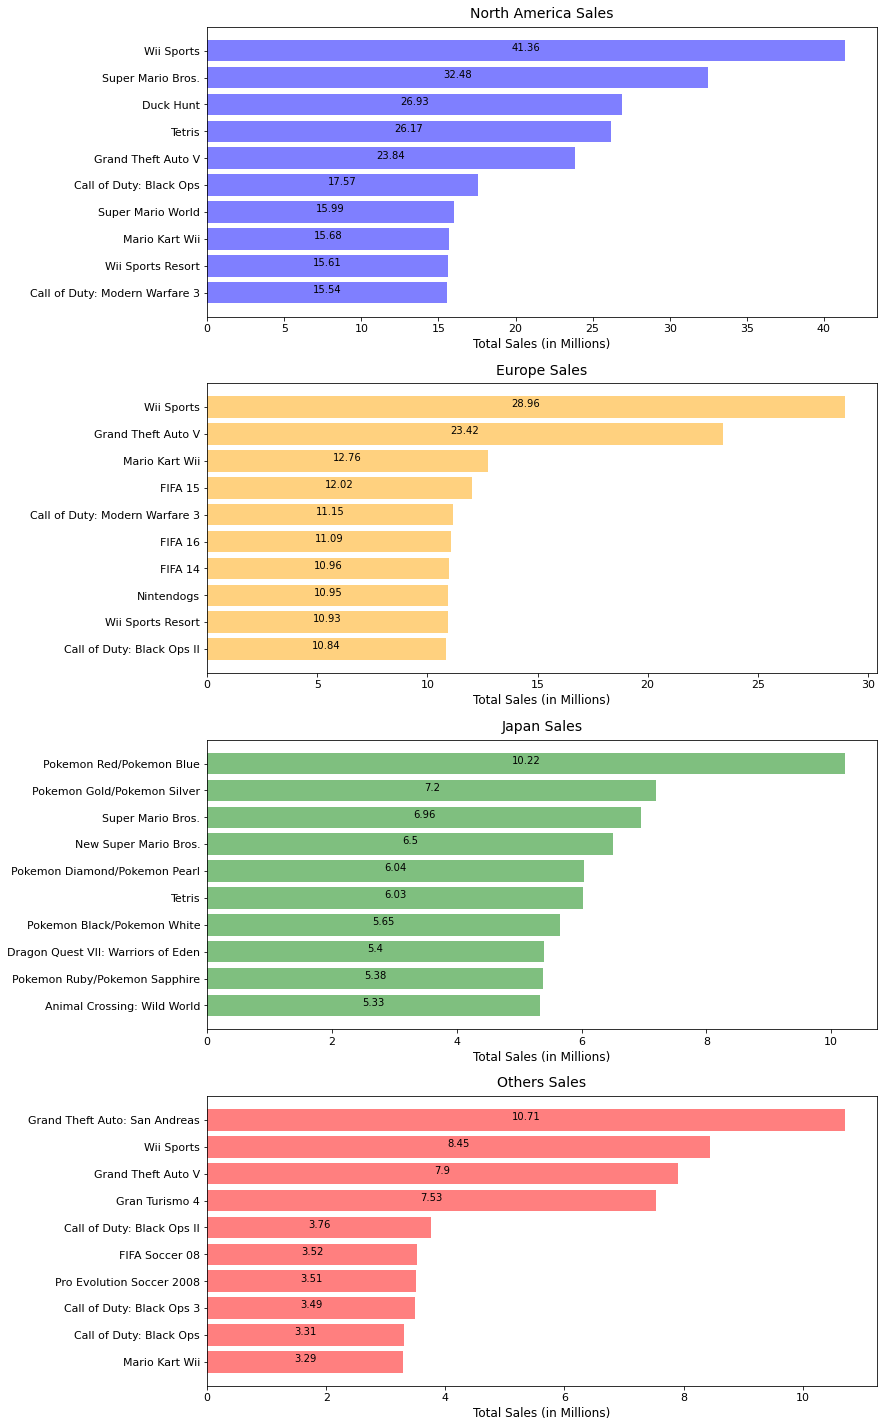

In [17]:
# Top 10 games with highest sales for each region:
res = vg_sales.groupby('Name')[['North America Sales', 'Europe Sales', 
                                     'Japan Sales', 'Others Sales']]
res = res.sum()
fig, axes = plt.subplots(4, 1, figsize=(12, 25))
for i in range(4):
    rec = res.iloc[:, i].sort_values()[-10:]
    axes[i].barh(rec.index, rec.values, color=colors_region[i], alpha=0.5)
    axes[i].set_title(rec.name, fontsize=14, y=1.01)
    axes[i].set_xlabel('Total Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=11)
    axes[i].tick_params(axis='y', labelsize=11)
    for j in rec.index:
        axes[i].text(rec.loc[j] / 2, j, round(rec.loc[j], 2), 
                     ha='center')
    #add_bar_label(axes[i], rec, xincr=0.8, isbarh=True)
fig.subplots_adjust(hspace=0.23)

**Interpretation:**

The graph above shows the top 10 high selling video game titles for each region.

As we can see here, **Wii Sports** is the title with the highest sale in **North America** and **Europe** and second highest sale in **other regions**. This is not surprising as Wii Sports is identified as the [globally highest selling game](#global_sales_title).

Also, it's not surprising how **5 out of 10** top games in Europe are **sports title** as Europeans really love sports, **football** being the most popular. This evident as **three(3) FIFA titles** are included in their top 10 high selling games.

And also as expected, most games in top 10 of Japan are role-playing games with Pokemon titles appeared in **five(5)** positions in the ranking.

## Top 10 Video Game Titles per Genre

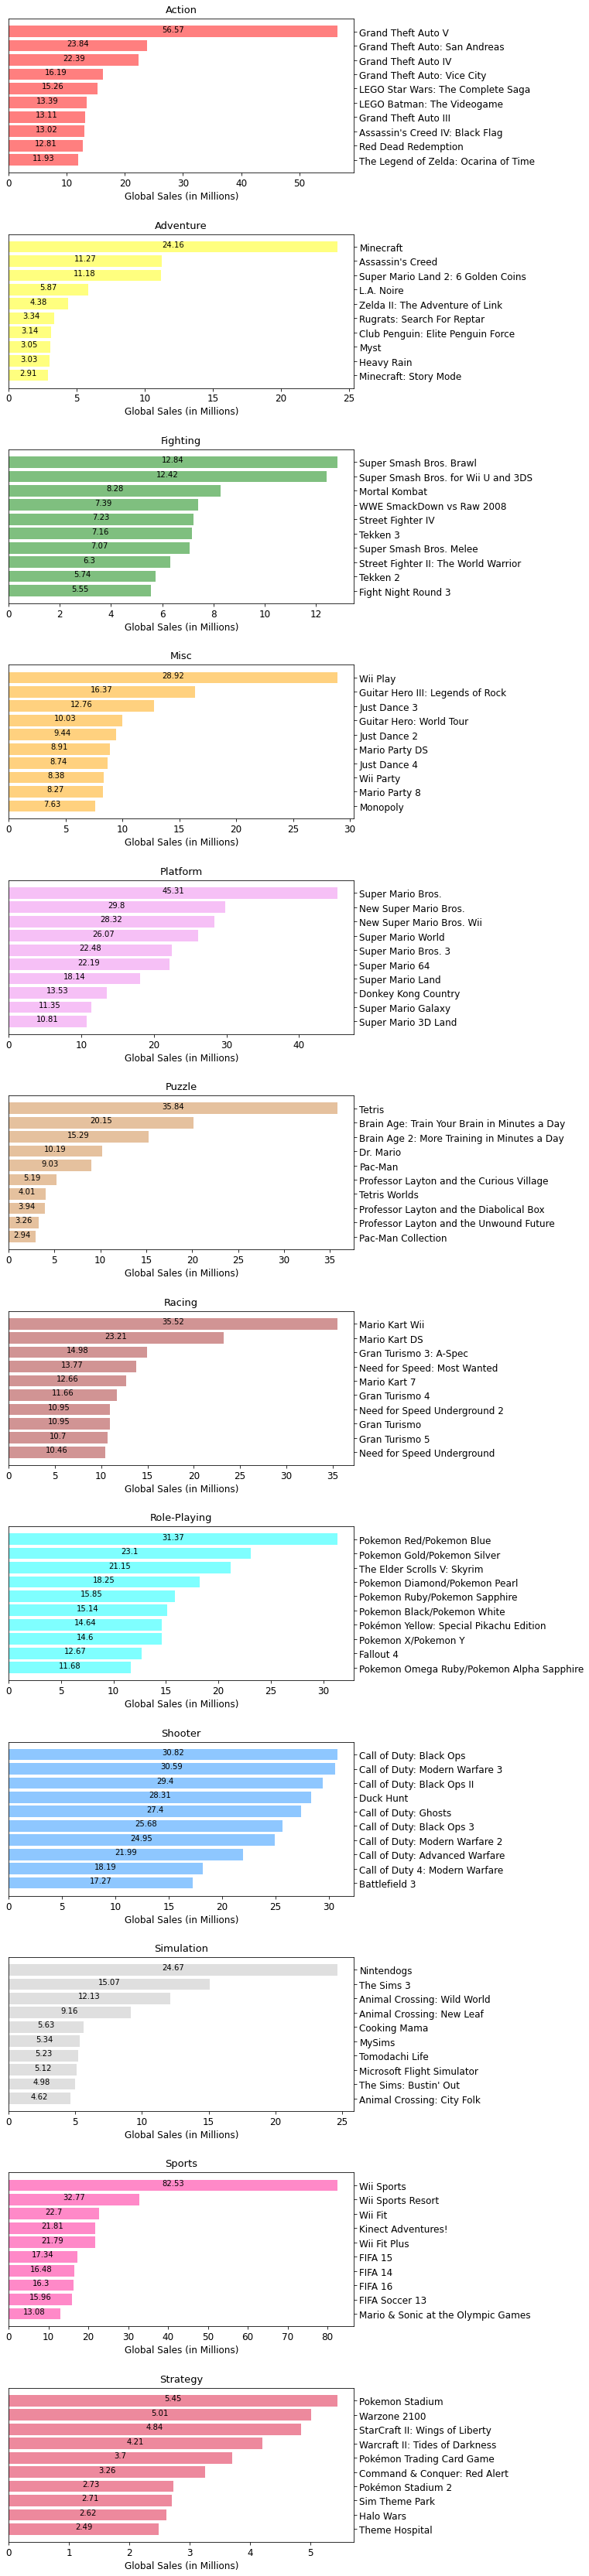

In [18]:
title_sales = vg_sales.groupby('Name')['Global Sales'].sum()
title_genres = vg_sales[['Name', 'Genre']]
res = pd.merge(title_sales, title_genres, on='Name').set_index(['Genre', 'Name'])
res = res.sort_index()
fig, axes = plt.subplots(12, 1, figsize=(8, 60))
genres = res.reset_index()['Genre'].unique()
for i in range(12):
    genre = genres[i]
    rec = res.loc[genre].sort_values(by='Global Sales')
    rec = rec.drop_duplicates()[-10:]
    axes[i].barh(rec['Global Sales'].index, rec['Global Sales'].values, 
                 color=colors_genre[i], alpha=0.5)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
    axes[i].set_title(genre, fontsize=13, y=1.01)
    axes[i].set_xlabel('Global Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    s = rec['Global Sales']
    for j in s.index:
        axes[i].text(s.loc[j] / 2, j, round(s.loc[j], 2), ha='center')
fig.subplots_adjust(hspace=0.4)

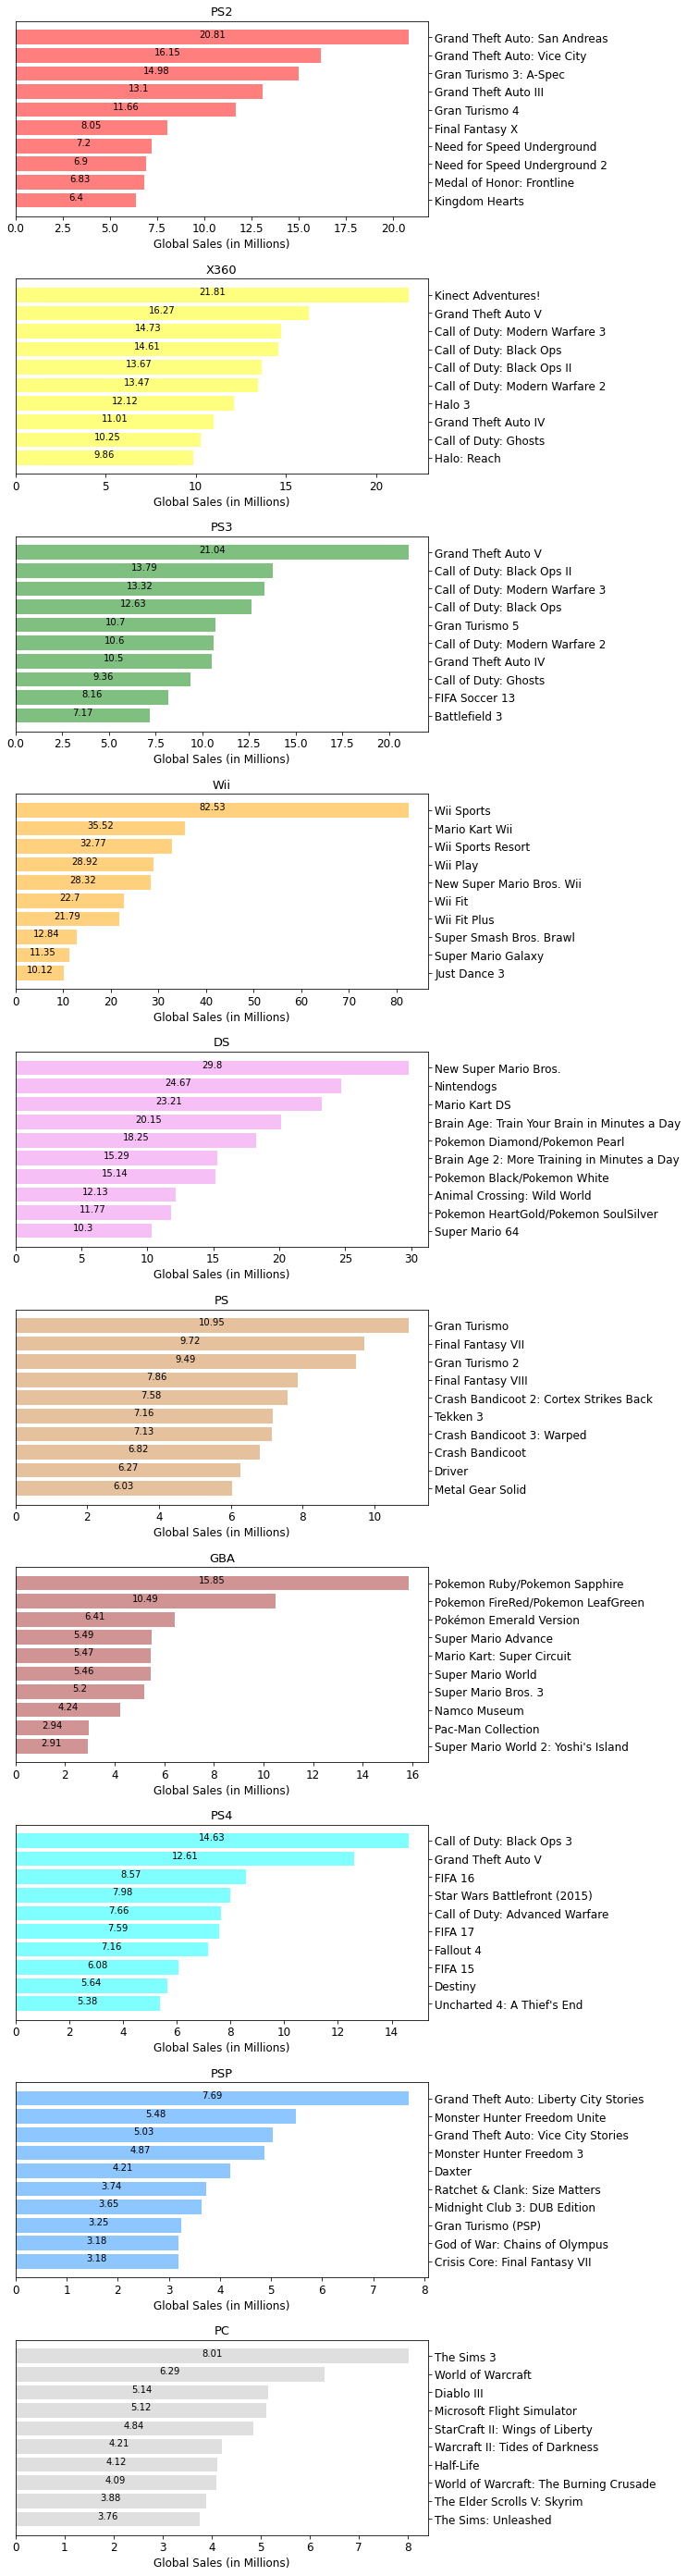

In [19]:
# Top 10 games with highest sales for each platform:
res = vg_sales.groupby('Platform')[['Name', 'Global Sales']]
res = res.apply(lambda x: x.sort_values('Global Sales')[-10:])
top_10_platforms = platform_global_sales.index[:10]
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    rec = res.loc[top_10_platforms[i]]
    axes[i].barh(rec.Name, rec['Global Sales'], color=colors_genre[i], alpha=0.5)
    axes[i].set_title(top_10_platforms[i], fontsize=13)
    axes[i].set_xlabel('Global Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
    s = rec.set_index('Name')['Global Sales']
    for j in s.index:
        axes[i].text(s.loc[j] / 2, j, round(s.loc[j], 2), ha='center')
fig.subplots_adjust(hspace=0.32)

**Interpretation:**

The graph aboves shows the top 10 high selling video game titles for top 10 high selling platforms.

For example, for the **PS2** platform, the top highest selling game is **GTA: San Andreas** (very nostalgic indeed).

## Top 10 Video Game Titles per Genre

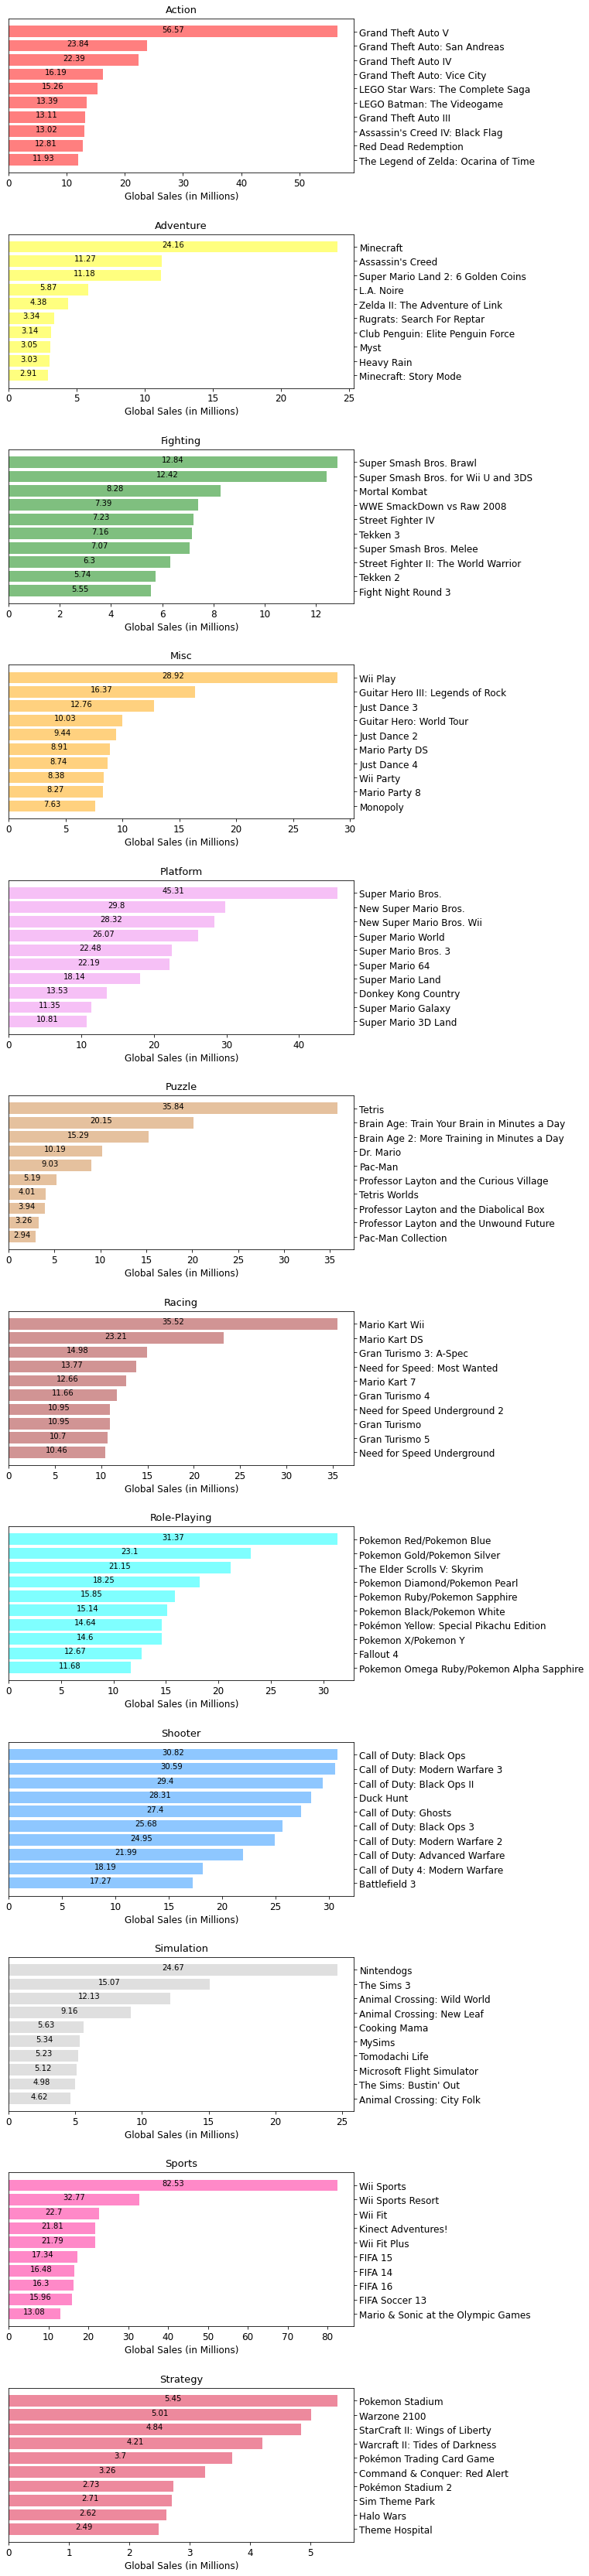

In [20]:
title_sales = vg_sales.groupby('Name')['Global Sales'].sum()
title_genres = vg_sales[['Name', 'Genre']]
res = pd.merge(title_sales, title_genres, on='Name').set_index(['Genre', 'Name'])
res = res.sort_index()
fig, axes = plt.subplots(12, 1, figsize=(8, 60))
genres = res.reset_index()['Genre'].unique()
for i in range(12):
    genre = genres[i]
    rec = res.loc[genre].sort_values(by='Global Sales')
    rec = rec.drop_duplicates()[-10:]
    axes[i].barh(rec['Global Sales'].index, rec['Global Sales'].values, 
                 color=colors_genre[i], alpha=0.5)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
    axes[i].set_title(genre, fontsize=13, y=1.01)
    axes[i].set_xlabel('Global Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    s = rec['Global Sales']
    for j in s.index:
        axes[i].text(s.loc[j] / 2, j, round(s.loc[j], 2), ha='center')
fig.subplots_adjust(hspace=0.4)

**Interpretation:**

The graph above shows the top 10 game titles for each genre.

For example, we can see that under **Action** genre, the **top 4** highest selling games are all **GTA titles**. 

## <a id='top_publisher'>Top 20 Publishers with most number of Published Games</a>

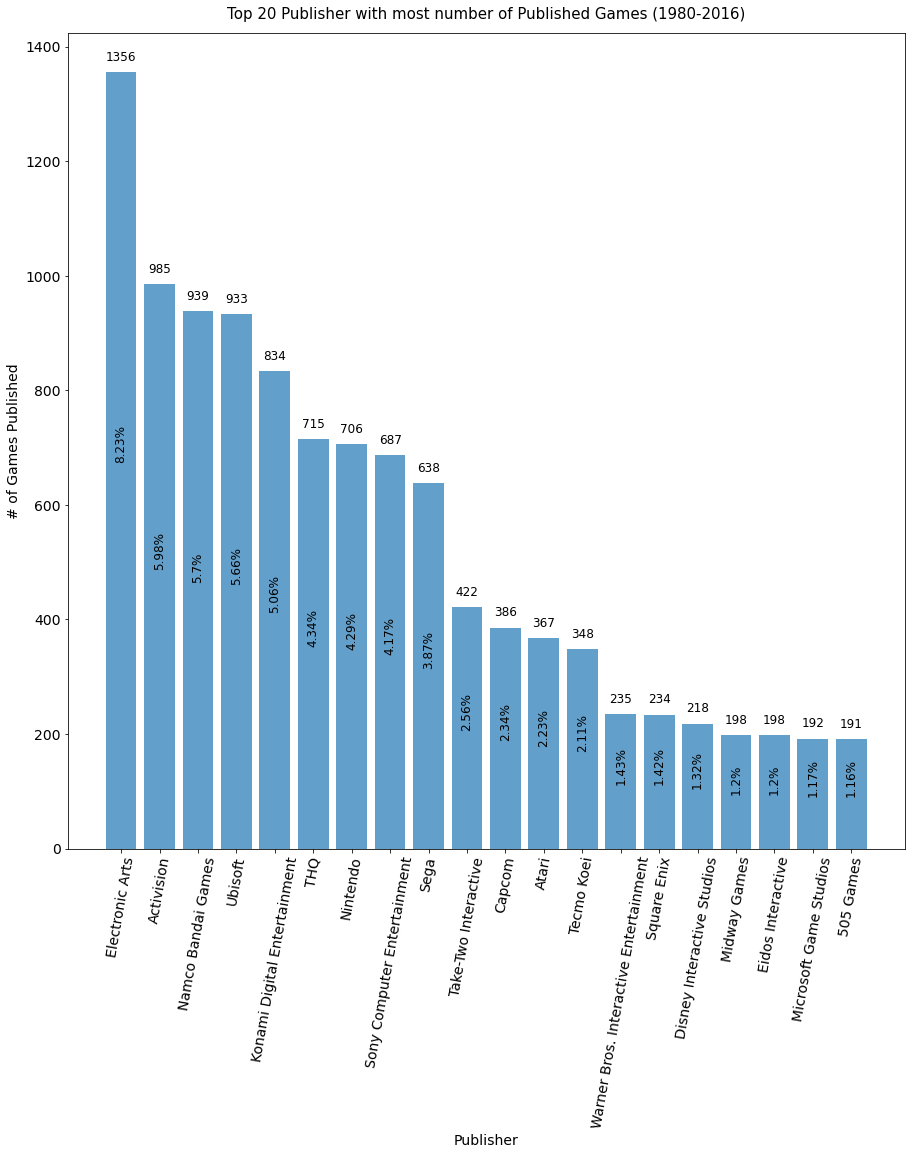

In [41]:
top_publisher = vg_sales.Publisher.value_counts()[:20]
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(top_publisher.index, top_publisher.values, alpha=0.7)
ax.set_title('Top 20 Publisher with most number of Published Games (1980-2016)', fontsize=15, y=1.01)
ax.set_ylabel('# of Games Published', fontsize=14)
ax.set_xlabel('Publisher', fontsize=14)
ax.tick_params(axis='x', labelsize=14, rotation=80)
ax.tick_params(axis='y', labelsize=14)
pct = vg_sales.Publisher.value_counts(normalize=True)[:20] * 100
add_bar_label(ax, top_publisher, yincr=20, fontsize='large')
# Add pct
for i in pct.index:
    i_pct = f'{round(pct.loc[i], 2)}%'
    ax.text(i, top_publisher.loc[i] // 2, i_pct, ha='center', fontsize='large', rotation=90)

**Interpretation:**

The graph above shows the top 20 Publishers with most number of Published Games since 1980.

As we can see here, **1356** unique game titles are published by **Electronic Arts** which is the highest and **8.23%** of the total number of games published since 1980 to 2016.

Next to Electronic Arts are **Activision and Namco Bandai Games** with total of **985 and 939** published games respectively.

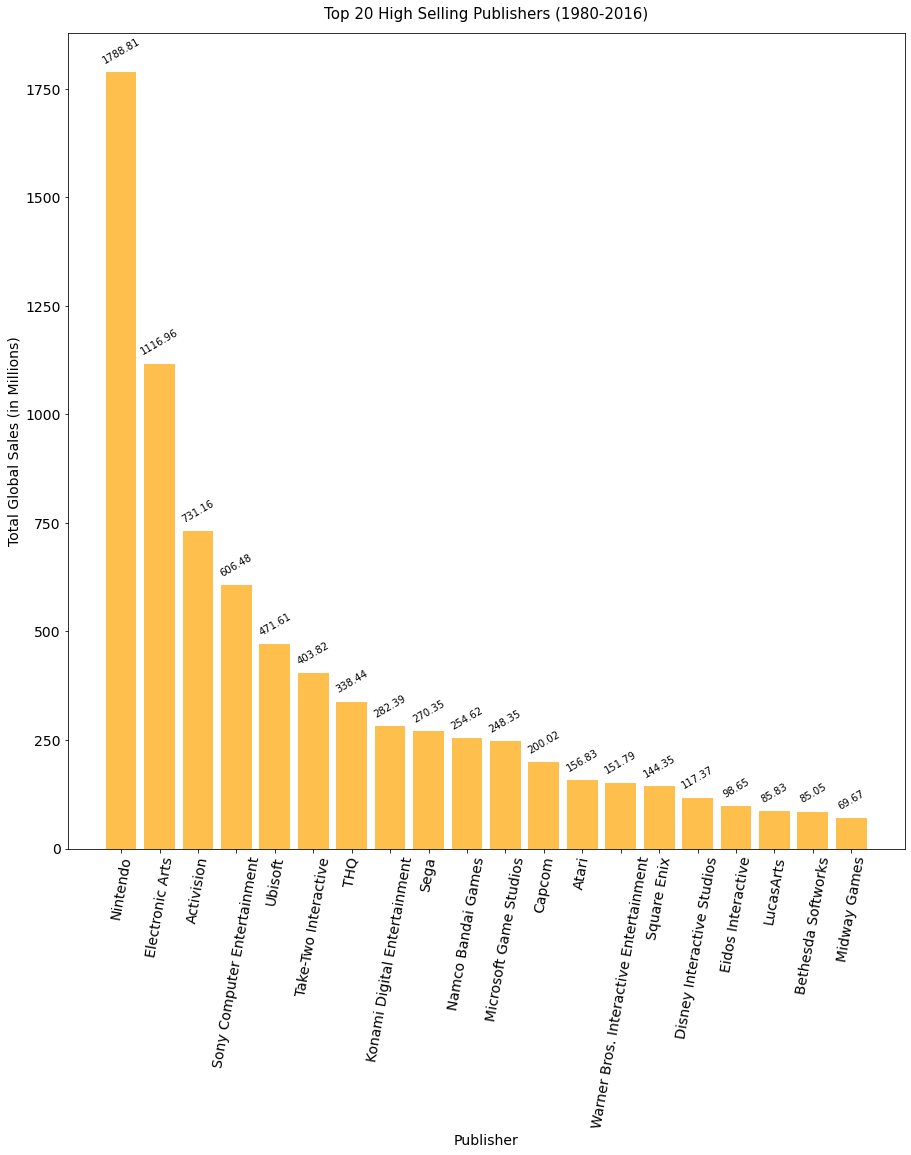

In [33]:
top_high_selling_publisher = vg_sales.groupby('Publisher')['Global Sales']
top_high_selling_publisher = top_high_selling_publisher.sum().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(top_high_selling_publisher.index, top_high_selling_publisher.values, color='orange', alpha=0.7)
ax.set_title('Top 20 High Selling Publishers (1980-2016)', fontsize=15, y=1.01)
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14)
ax.set_xlabel('Publisher', fontsize=14)
ax.tick_params(axis='x', labelsize=14, rotation=80)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, top_high_selling_publisher, yincr=20, fontsize='medium', rotation=30)

**Interpretation:**

The graph above shows the top 20 high selling Publishers from 1980 to 2016.

As we can see here, even though **Nintendo** is only at [top 7 in terms of number of published games.](#top_publisher) Nintendo is the highest when it comes to number of sales with **1.788 billion** units of physical video games sold since 1980s.

The reason for Nintendo being the highest selling publisher is that since 1980, Nintendo developed 10 platforms that dominated the market in their time of release:

* NES (Nintendo Entertainment System) in 1983.
* GB (GameBoy) in 1989.
* SNES (Super Nintendo Entertainment System) in 1990.
* N64 (Nintendo 64) in 1996.
* GC (Nintendo GameCube) in 2001.
* GBA (GameBoy Advance) in 2001.
* DS (Nintendo DS) in 2004.
* Wii in 2006.
* 3DS (Nintendo 3DS) in 2011.
* Wii U in 2012.

All these platforms are all included in [top 5 platforms that dominated the market in their time of release](#five_year). 

<AxesSubplot:xlabel='Publisher'>

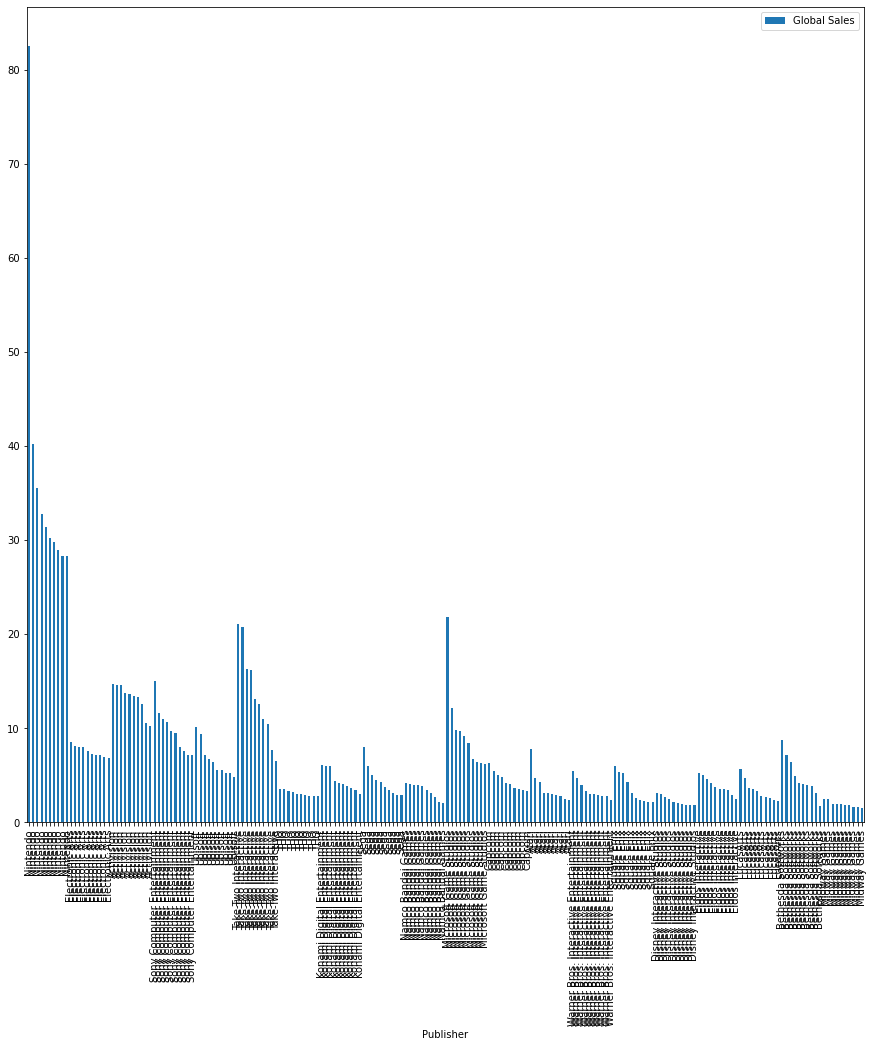

In [99]:
res = vg_sales.groupby('Publisher', group_keys=False)[['Name', 'Global Sales']]
res = res.apply(lambda x: x.sort_values(by='Global Sales', ascending=False)[:10]).reset_index()
res = res.set_index('Publisher').drop(columns='level_1').loc[top_high_selling_publisher.index]
#fig, ax = plt.subplots(figsize=(15, 15))
#ax.bar(top_high_selling_publisher.index, top_high_selling_publisher.values, color='orange', alpha=0.7)
res.plot.bar(figsize=(15,15), stacked=True)

# Conclusion